In [1]:
import numpy as np

#plotting tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# GPy: Gaussian processes library
import GPy

from IPython.display import display

In [3]:
k = GPy.kern.RBF(1)
k.variance

index,rbf.variance,constraints,priors
[0],1.00000000,+ve,


In [5]:
# 100 samples in the interval [-4, 4]

x = np.linspace(-4, 4, 100)[:, None]
K = k.K(x, np.array([[0.]]))

Text(0.5, 1.0, "$\\kappa_{RBF}(x,x')$")

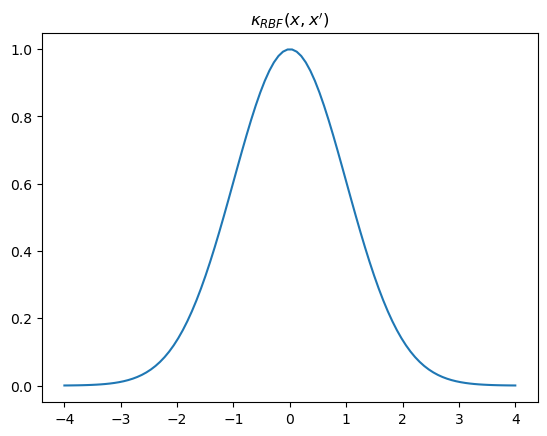

In [7]:
plt.plot(x, K)
plt.title("$\kappa_{RBF}(x,x')$")

In [9]:
fig, ax = plt.subplots()
from matplotlib.animation import FuncAnimation

from matplotlib import rc
ls = [0.05, 0.25, 0.5, 1., 2., 4.]

def update(iteration):
    ax.cla()
    k.lengthscale = ls[iteration]
    # calculate the new covariance function at k(x, 0)
    C = K = k.K(x, np.array([[0.]]))
    ax.plot(x, C, label=f"lengthscale = {ls[iteration]}")
    ax.set_ylim(0, 1.2)
    ax.legend()

num_iterations = len(ls)

ani = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
ani

Text(0.5, 1.0, "$\\kappa_{RBF}(x,x')$")

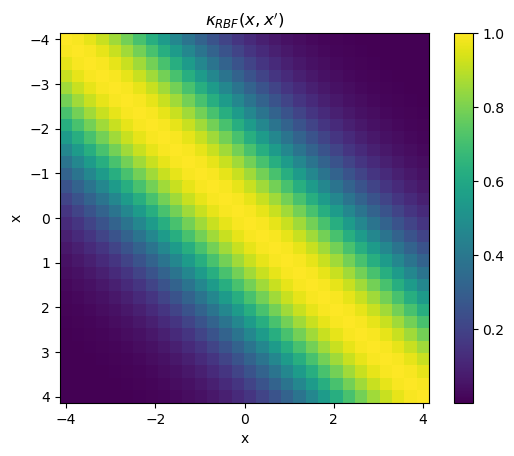

In [12]:
X = np.linspace(-4, 4., 30)[:, None]
K = k.K(X, X)

# plot the covariance function pf the sample space

plt.pcolor(X.T, X, K)

plt.gca().invert_yaxis(), plt.gca().axis("image")
plt.xlabel("x"), plt.ylabel("x"), plt.colorbar()
plt.title("$\kappa_{RBF}(x,x')$")
# fig, ax = plt.subplots()
# ax.matshow(K, vmin=0, vmax=1.2)
# ax.set_title("Covariance Matrix")
# plt.show()

### GP Regression

Creating a data set


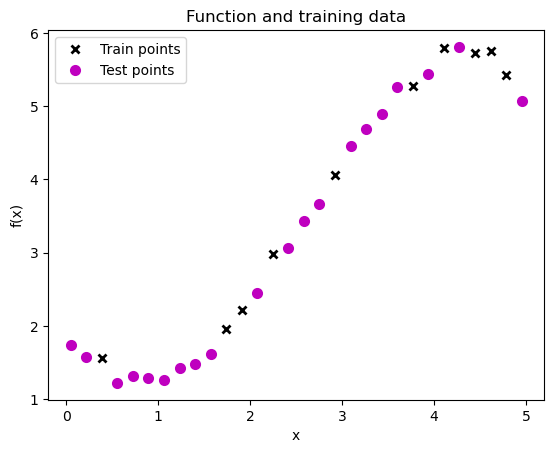

In [13]:
# lambda function, call f(x) to generate data

f = lambda x: 0.4*x**2 - 0.15*x**3 + 0.5*x**2- 0.002*x**5 + 0.0002*x**6 + 0.5*(x-2)**2

np.random.seed(0)
# 30 equally spaced sample locations
X = np.linspace(0.05, 4.95, 30)[:, None]

np.random.shuffle(X)

# generate y values using the function f(x), y = f(x) + epsilon
Y = f(X) + np.random.normal(0., 0.1, (30, 1))

trainX = X[:10]
trainY = Y[:10]

testX = X[10:]
testY = Y[10:]

# plot observations
plt.plot(trainX, trainY, "kx", mew=2, label='Train points')
plt.plot(testX, testY, "mo", mew=2, label='Test points')

# Annotate the plot

plt.legend()
plt.xlabel("x"), plt.ylabel("f(x)"), plt.title("Function and training data")
plt.show()

#### fitting the above using GPR wot RBF kernel

In [18]:
fig, ax = plt.subplots()

from sklearn.metrics import mean_absolute_error

def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]

    # create a new GPy model with the new kernel
    m = GPy.models.GPRegression(trainX, trainY, kernel=k)
    # plot the predictions
    m.Gaussian_noise = 0.0
    m.plot(ax=ax)

    ax.plot(testX, testY, "mo", mew=2, label='Test points')
    ax.set_title(f"Length scale= , MAE =")
    ax.legend()
    fig.tight_layout()

num_iterations = len(ls)

ani = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)

plt.close()

rc('animation', html='jshtml')
ani

### Optimising the kernel Parameters

Learn parameters by MLE

In [19]:
k = GPy.kern.RBF(1)
m = GPy.models.GPRegression(trainX, trainY, k)
m.optimize()

In [20]:
m

GP_regression.,value,constraints,priors
rbf.variance,12.43307322923066,+ve,
rbf.lengthscale,2.3466333974530027,+ve,
Gaussian_noise.variance,0.017278356392146116,+ve,


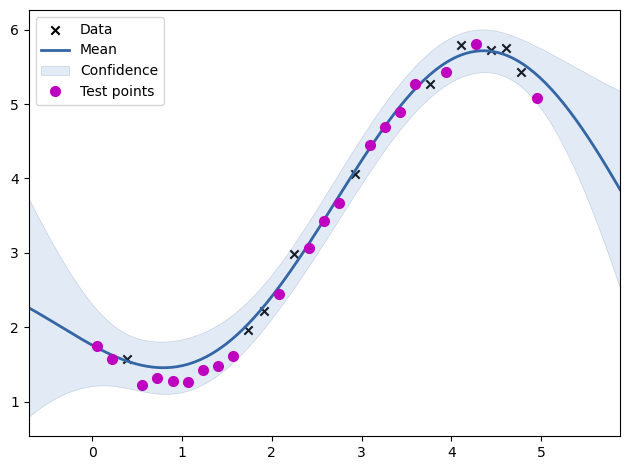

In [21]:
m.plot()
ax = plt.gca()
ax.plot(testX, testY, "mo", mew=2, label='Test points')

ax.legend()

In [22]:
mean_absolute_error(testY, m.predict(testX)[0].flatten())

0.12614127566448882

### AIR QUALITY 2D MAP

real world